# 感知机

感知机（Perceptron）是二分类的线性分类模型，输入为实例的特征向量，输出为实例的类别（取`+1`或`-1`）。感知机的学习过程就是将实例通过分离超平面将特征空间划分为两类，为求得超平面导入了基于误分类的损失函数，利用梯度下降法对损失函数进行最优化。

![perceptron](images/perceptron.png)


## 1. 生物学、心理学解释

心理学家唐纳德·赫布（Donald Olding Hebb）于1949年提出`赫布理论`，该理论能够解释学习的过程中脑中的神经元所发生的变化。赫布理论描述了突触可塑性的基本原理，即突触前神经元向突触后神经元的持续重复的刺激，可以导致突触传递效能的增加：
> 当细胞A的轴突足以接近以激发细胞B，并反复持续地对细胞B放电，一些生长过程或代谢变化将发生在某一个或这两个细胞内，以致A作为对B放电的细胞中的一个，导致突触传递效能的增加。

![neuron_cell](images/neuron_cell_cn.png)


心理学家弗兰克·罗森布拉特(Frank Rosenblatt)于1957年提出了`感知机`，它作为简化的数学模型解释大脑神经元如何工作：它取一组二进制输入值（附近的神经元），将每个输入值乘以一个连续值权重（每个附近神经元的突触强度），并设立一个阈值，如果这些加权输入值的和超过这个阈值，就输出1，否则输出0，这样的工作原理就相当于神经元是否放电。


感知机并没有完全遵循赫布理论，**但通过调输入值的权重，可以有一个非常简单直观的学习方案：给定一个有输入输出实例的训练集，感知机应该「学习」一个函数：对每个例子，若感知机的输出值比实例低太多，则增加它的权重；否则若设比实例高太多，则减少它的权重。**


感知机模仿的是生物神经系统内的神经元，它能够接受来自多个源的信号输入，然后将信号转化为便于传播的信号在进行输出(在生物体内表现为电信号)。

![neuron](images/neuron.png)

* dendrites - 树突
* nucleus - 细胞核
* axon - 轴突


## 2. 感知机模型

假设输入空间(特征向量)为$\mathbf{X} \subseteq \mathbb{R}^D$，输出空间为$\mathbf{Y} \in \{-1, +1\}$。输入$x \in \mathbf{X}$ 表示实例的特征向量，对应于输入空间的点；输出$y \in \mathbf{Y}$表示示例的类别。由输入空间到输出空间的函数为

$$
f(x) = sign(w x + b)
$$

称为感知机。其中，参数$w$叫做权值向量，$b$称为偏置。$w·x$表示$w$和$x$的内积。$sign$为符号函数，即
![sign_function](images/sign.png)




### 2.1 几何解释    
感知机模型是`线性分类模型`，感知机模型的假设空间是定义在特征空间中的所有线性分类模型，即函数集合$\{ f | f(x)=w·x+b\}$。线性方程 $w·x+b=0$对应于特征空间$\mathbb{R}^D$中的一个超平面$S$，其中$w$是超平面的法向量，$b$是超平面的截距。这个超平面把特征空间划分为两部分，位于两侧的点分别为正负两类。超平面$S$称为分离超平面，如下图：
![perceptron_geometry_def](images/perceptron_geometry_def.png)



## 3. 感知机学习策略

假设训练数据集是 **线性可分**，感知机学习的目标是求得一个能够将训练数据的正负实例点完全分开的分离超平面，即最终求得参数$w, b$。这需要一个学习策略，即定义（经验）损失函数并将损失函数最小化。

损失函数的一个自然的选择是误分类的点的总数，但是这样得到的损失函数不是参数$w，b$的连续可导函数，不宜优化。损失函数的另一个选择是误分类点到分类面的距离之和。

首先，对于任意一点$x$到超平面的距离（[参考资料](https://www.cnblogs.com/graphics/archive/2010/07/10/1774809.html)）为
$$
\frac{1}{||w||} | w \cdot x + b |
$$

其次，对于误分类点$(x_i,y_i)$来说 $-y_i(w \cdot x_i + b) > 0$

这样，假设超平面$S$的总的误分类点集合为$\mathbf{M}$，那么所有误分类点到$S$的距离之和为
$$
-\frac{1}{||w||} \sum_{x_i \in \mathbf{M}} y_i (w \cdot x_i + b)
$$
不考虑$1/||w||$，就得到了感知机学习的损失函数
$$
L = - \sum_{x_i \in \mathbf{M}} y_i (w \cdot x_i + b)
$$

### 3.1 经验风险函数

给定数据集$\mathbf{T} = \{(x_1,y_1), (x_2, y_2), ... (x_N, y_N)\}$，其中
* $x_i \in \mathbb{R}^D$
* $y_i \in \{-1, +1\}，i=1,2...N$

感知机$sign(w·x+b)$学习的损失函数定义为
$$
L(w, b) = - \sum_{x_i \in \mathbf{M}} y_i (w \cdot x_i + b)
$$
其中$\mathbf{M}$为误分类点的集合，这个损失函数就是感知机学习的[经验风险函数](https://blog.csdn.net/zhzhx1204/article/details/70163099)。

显然，损失函数$L(w,b)$是非负的。
* 如果没有误分类点，那么$L(w,b)$为0
* 误分类点数越少，$L(w,b)$值越小

该损失函数在误分类时是参数$w,b$的线性函数，在正确分类时该损失函数是0。因此，给定训练数据集$\mathbf{T}$，损失函数$L(w,b)$是$w,b$的连续可导函数。


## 4. 感知机学习算法


最优化问题：给定数据集$\mathbf{T} = \{(x_1,y_1), (x_2, y_2), ... (x_N, y_N)\}$，其中
* $x_i \in \mathbb{R}^D$
* $y_i \in \{-1, +1\}，i=1,2...N$

求参数$w,b$，使其成为损失函数的解，其中$\mathbf{M}$为误分类数据的集合：

$$
min_{w,b} L(w, b) =  - \sum_{x_i \in \mathbf{M}} y_i (w \cdot x_i + b)
$$

感知机学习是误分类驱动的，具体采用随机梯度下降法：
* 首先，任意选定$w_0$、$b_0$，
* 然后用梯度下降法不断极小化目标函数
   - 极小化的过程不是一次性的把$\mathbf{M}$中的所有误分类点梯度下降
   - 而是一次随机选取一个误分类点使其梯度下降。

假设误分类集合$\mathbf{M}$是固定的，那么损失函数$L(w,b)$的梯度为
$$
\triangledown_w L(w, b) = - \sum_{x_i \in \mathbf{M}} y_i x_i \\
\triangledown_b L(w, b) = - \sum_{x_i \in \mathbf{M}} y_i \\
$$

随机选取一个误分类点$(x_i,y_i)$,对$w,b$进行更新：
\begin{eqnarray}
w & = & w + \eta y_i x_i \\
b & = & b + \eta y_i
\end{eqnarray}

式中$\eta$（0 ≤ $ \eta $ ≤ 1）是学习速率（步长）：
* 步长越大，梯度下降的速度越快，更能接近极小点。如果步长过大，有可能导致跨过极小点，导致函数发散；
* 如果步长过小，有可能会耗很长时间才能达到极小点。

> 直观解释：当一个实例点被误分类时，调整$w,b$，使分离超平面向该误分类点的一侧移动，以减少该误分类点与超平面的距离，直至超越该点被正确分类。



### 4.1 算法


**输入：**
* $\mathbf{T}=\{(x_1,y_1),(x_2,y_2), ..., (x_N,y_N)\}$, 其中$x_i \in \mathbf{X}=\mathbb{R}^D$，
* $y_i \in \mathbf{Y} = {-1, +1}，i=1,2...N$，
* 学习速率为η

**输出：**
* $w$, $b$; 
* 感知机模型$f(x)=sign(w·x+b)$

**处理过程:**
1. 初始化$w_0$,$b_0$
2. 在训练数据集中选取$(x_i, y_i）$
3. 如果$y_i(w * x_i+b)≤0$
           
    $w = w + η y_i x_i$
    
    $b = b + η y_i$

4. 如果所有的样本都正确分类，或者迭代次数超过设定值，则终止
5. 否则，跳转至（2）


## 5. 示例程序

生成数据：

[2 2 2 2 2 1 1 2 1 1 1 1 2 1 1 1 1 2 2 2]


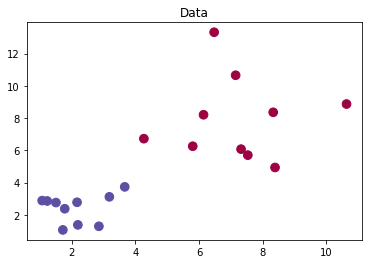

In [4]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# data generation
np.random.seed(314)

data_size1 = 10
x1 = np.random.randn(data_size1, 2) + np.array([2,2])
y1 = [-1 for _ in range(data_size1)]

data_size2 = 10
x2 = np.random.randn(data_size2, 2)*2 + np.array([8,8])
y2 = [1 for _ in range(data_size2)]

# all sample data
x = np.concatenate((x1, x2), axis=0)
y = np.concatenate((y1, y2), axis=0)

shuffled_index = np.random.permutation(data_size1 + data_size2)
x = x[shuffled_index]
y = y[shuffled_index]

train_data = np.concatenate((x, y[:, np.newaxis]), axis=1)

label_y = y.copy()
label_y[label_y==-1] = 2;
print(label_y)
# plot data
plt.scatter(train_data[:,0], train_data[:,1], marker='.',  s = 300,
            c=label_y, cmap=plt.cm.Spectral)
plt.title("Data")
plt.savefig("fig-res_perceptron_sample_data.pdf")
plt.show()


学习模型：

In [5]:
import random
import numpy as np


def sign(v):
    """符号函数"""
    if v > 0:  return 1
    else:      return -1
    
def perceptron_train(train_data, eta=0.01, n_iter=100):
    """对感知机模型进行训练"""
    weight = [0, 0]      # 权重
    bias = 0             # 偏置量
    learning_rate = eta  # 学习速率

    train_num = n_iter  # 迭代次数

    for i in range(train_num):
        # select one data
        ti = np.random.randint(len(train_data))
        (x1, x2, y) = train_data[ti]
        
        y_pred = sign(weight[0] * x1 + weight[1] * x2 + bias) 
        
        if y * y_pred <= 0:  # 判断误分类点
            weight[0] = weight[0] + learning_rate * y * x1  # 更新权重
            weight[1] = weight[1] + learning_rate * y * x2
            bias      = bias      + learning_rate * y       # 更新偏置量
            print("update weight/bias: ", weight[0], weight[1], bias)

    return weight, bias

def perceptron_pred(data, w, b):
    """输入数据，模型，对数据进行分类"""
    y_pred = []
    for d in data:
        x1, x2, y = d
        yi = sign(w[0]*x1 + w[1]*x2 + b)
        y_pred.append(yi)
        
    return np.array(y_pred, dtype=float)


# 训练感知机
w, b = perceptron_train(train_data)
print("w = ", w)
print("b = ", b)

# 预测 
y_pred = perceptron_pred(train_data, w, b)

# 计算分类精度
c = y_pred == y
cn = np.sum(c == True)
acc = cn / len(y_pred)
print()

print("\n")
print("ground_truth: ", train_data[:, 2])
print("predicted:    ", y_pred)
print("accuracy:     ", acc)

update weight/bias:  0.07325039214048326 0.060772571520809705 0.01
update weight/bias:  0.062566964043177 0.03190596273096258 0.0
update weight/bias:  0.03404411311115712 0.018976672320378515 -0.01
update weight/bias:  0.012129068771329451 0.005164310624982555 -0.02
update weight/bias:  -0.00014517680889533473 -0.023465561237760862 -0.03
update weight/bias:  0.0713959163401008 0.08314537803031186 -0.019999999999999997
update weight/bias:  0.0542085166022163 0.07246463232195308 -0.03
update weight/bias:  0.032293472262388635 0.05865227062655712 -0.04
update weight/bias:  0.021610044165082384 0.02978566183670999 -0.05
update weight/bias:  -0.006912806766937504 0.016856371426125928 -0.060000000000000005
update weight/bias:  0.06846048372313081 0.07391187131553799 -0.05
update weight/bias:  0.05127308398524631 0.06323112560717921 -0.060000000000000005
update weight/bias:  0.022750233053226425 0.050301835196595146 -0.07
update weight/bias:  0.007735605555448376 0.022658580338947076 -0.08
up

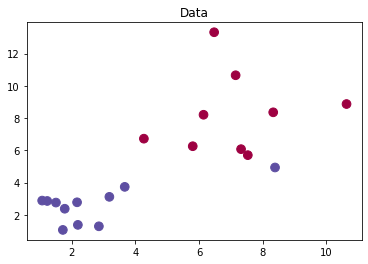

In [6]:
label_y = y_pred.copy()
label_y[label_y==-1] = 2;

# plot data
plt.scatter(train_data[:,0], train_data[:,1], marker='.',  s = 300,
            c=label_y, cmap=plt.cm.Spectral)
plt.title("Data")
plt.savefig("fig-res_perceptron_res_data.pdf")
plt.show()

## 参考资料
* [感知机（Python实现）](http://www.cnblogs.com/kaituorensheng/p/3561091.html)
* [Programming a Perceptron in Python](https://blog.dbrgn.ch/2013/3/26/perceptrons-in-python/)
* [损失函数、风险函数、经验风险最小化、结构风险最小化](https://blog.csdn.net/zhzhx1204/article/details/70163099)